# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [503]:
# Contacts campaign data mainly comprise of first and final contact data however, only the numbers of intermediate contancts
# with prospective customer to be retained rather then the complete feature data    

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [610]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [611]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [612]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [613]:
# Investiage null values for respective features 
df.isnull().sum()
####### (Observation) #########
## No nulls presence

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [614]:
df.shape
####### (Observation) #########
## (41188,21)

(41188, 21)

In [615]:
df[df == 'unknown'].count()
####### (Observation) #########
## job                330
## marital             80
## education         1731
## default           8597
## housing            990
## loan               990

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [616]:
cols_wt_unknowns = df[['job','marital','education','default','housing','loan']]

#Get all row indexes with 'unknown' in either of the feature
cols_wt_unknowns[(cols_wt_unknowns == 'unknown').any(axis = 1)].index

####### (Observation) #########
## 10700 samples with 'unknown' as either of the feature

Index([    1,     5,     7,    10,    15,    17,    19,    21,    26,    27,
       ...
       41109, 41110, 41113, 41114, 41115, 41118, 41120, 41122, 41135, 41175],
      dtype='int64', length=10700)

In [617]:
#Drop all the rows
df.drop(cols_wt_unknowns[(cols_wt_unknowns == 'unknown').any(axis = 1)].index, axis=0, inplace= True)
df.shape
####### (Observation) #########
## 30488 samples after cleaning all the samples with 'unknown'

(30488, 21)

In [618]:
df.rename(columns={ 'y': 'Subscribed', 'job': 'Job', 'marital':'Marital Status', 'default': 'Defaulter', 'education':'Education Level'}, inplace= True) #Replace column name

df['Subscribed'].replace({'yes':'Yes', 'no' : 'No'}, inplace= True) # Reformat data
df['Defaulter'] = df['Defaulter'].replace({'no': "Not Defaulter", 'yes': 'Defaulter'}) # Reformat data

df['Job'] = df['Job'].replace({'admin.':'admin'}).str.capitalize() # Reformat data and captilize
df['Marital Status'] = df['Marital Status'].str.capitalize() # Captilize data
df['Education Level'] = df['Education Level'].str.capitalize() # Captilize data


In [619]:
## Create bar graph based on Jobs categorically identifying how many has subscribed term deposit
gp_by_jobs = df[['Job','Subscribed','age']].groupby(by=['Job','Subscribed']).count().reset_index()
gp_by_jobs.rename(columns={'age': 'Count'}, inplace= True) #Replace column name
gp_by_jobs_bar = px.bar(gp_by_jobs, x="Job", y="Count", color="Subscribed", title="Subscriber vs Job Profiles") #Create Bar graph
gp_by_jobs_bar.show() #Show graph

gp_by_jobs_sub_pie = px.pie(gp_by_jobs[gp_by_jobs['Subscribed'] == 'Yes'], values='Count',names='Job', title="Subscriber vs. Jobs Profile")
gp_by_jobs_no_sub_pie = px.pie(gp_by_jobs[gp_by_jobs['Subscribed'] == 'No'], values='Count',names='Job', title="Not Subscriber vs. Jobs Profile")

####### (Observation) #########
## Higher number of Admins which highest % of them among categories opted to be subscribed for term deposit

In [620]:
# Create subplots (1 row, 2 columns)
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("Subscriber vs. Jobs Profile", "Not Subscriber vs. Jobs Profile")
)

# Add first pie chart
fig.add_trace(gp_by_jobs_sub_pie.data[0], row=1, col=1)

# Add second pie chart
fig.add_trace(gp_by_jobs_no_sub_pie.data[0],row=1, col=2)

# Layout
fig.update_layout(
    title_text="",
    height=400,
    showlegend=True
)

#Show figure
fig.show()

####### (Observation) #########
# Higher number of 'Student' (50.8%) has subscribed for Term Deposits thought total population % seleceted to offer is very low  
# 41.5% 'Retired' population selected to contacted has opted
# 20.5 'Unemployed' has opted to subscribe for Term Deposit
# Higher number of customers contacted by telecomminication are 'Admin' and about 16% of contacted are converted 
# Surprisingly, turn-out rate for 'Blue-collar' jobs are 8% only


In [621]:
## Create bar graph based on marital status categorically identifying how many has subscribed term deposit
gp_by_marital = df[['Marital Status','Subscribed','age']].groupby(by=['Marital Status','Subscribed']).count().reset_index()
gp_by_marital.rename(columns={'age': 'Count'}, inplace= True) #Replace column name
fig = px.bar(gp_by_marital, x="Marital Status", y="Count", color="Subscribed", title="Subscriber vs Marital Status")#Create Bar graph
fig.show() #Show graph

####### (Observation) #########
# Order of contract based on 'Marital Status' - Married > Single > Divoreced
# Order of turn-outs in % of the contact population respectively - Single > Married > Divorces

In [622]:
## Create bar graph based on education categorically identifying how many has subscribed term deposit
gp_by_education = df[['Education Level','Subscribed','age']].groupby(by=['Education Level','Subscribed']).count().reset_index()
gp_by_education.rename(columns={'age': 'Count'}, inplace= True) #Replace column name
gp_by_education_bar = px.bar(gp_by_education, x="Education Level", y="Count", color="Subscribed") #Create Bar graph

# Add new column '% Turn Out' based education category
gp_by_education_total = gp_by_education[['Education Level','Count']].groupby('Education Level').sum()
for idx in range(0, gp_by_education.shape[0]):
    gp_by_education.at[idx,'% Turn Out'] = (gp_by_education.at[idx, 'Count']/gp_by_education_total.at[gp_by_education.at[idx, 'Education Level'], 'Count'])*100
gp_by_education_total_bar = px.bar(gp_by_education[gp_by_education['Subscribed'] == 'Yes'], x='Education Level', y='% Turn Out', color='Subscribed')
gp_by_education_total_bar.update_traces(marker_color='green')

# Create subplots (1 row, 2 columns)
education_subplots = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Subscriber vs Education level", "Customers Turn-out")
)

# Add first pie chart
education_subplots.add_traces(gp_by_education_bar.data)

# Add second pie chart
education_subplots.add_trace(gp_by_education_total_bar.data[0],row=1, col=2)

# Layout
education_subplots.update_layout(
    title_text="",
    height=400,
    showlegend=True
)

education_subplots.show()

####### (Observation) #########
# Illerate are not to be considered being very less population
# 2 extremes of the educations - 'Univesity Degree (14.8%) ' & 'Basic 4Y (13.69%)' group subscribe to term deposit in higher % i.e. >
# Based on % customers subscribed - 'Univesity Degree' > 'Basic 4Y' > 'Professional Degree' > 'High School'

In [623]:
## Create bar graph based on default categorically identifying how many has subscribed term deposit
gp_by_default = df[['Defaulter','Subscribed','age']].groupby(by=['Defaulter','Subscribed']).count().reset_index()
gp_by_default.rename(columns={'age': 'Count'}, inplace= True)  #Replace column name
print(gp_by_default)
fig = px.bar(gp_by_default, x="Defaulter", y="Count", color="Subscribed", title="Subscriber vs Defaulter") #Create Bar graph
fig.show() #Show graph

####### (Observation) #########
# Not many defaulters in the cleaned data set

       Defaulter Subscribed  Count
0      Defaulter         No      3
1  Not Defaulter         No  26626
2  Not Defaulter        Yes   3859


In [624]:
# Contact Duration of the call  
duration_fig = px.scatter(df, log_x='duration', y='Subscribed', color='Subscribed',  title='Call Duration vs Subscribed')
duration_fig.update_layout(xaxis_title='Call Duration (In Sec)')
duration_fig.show()
####### (Observation) #########
# Turn out rate is better for contacts having higher call duration 
# Successful contacts only when call duration is > 100 min

In [625]:
# contact month, day_of_week
df['month'] = df['month'].str.capitalize()
df['day_of_week'] = df['day_of_week'].str.capitalize()
count_by_month_day = df[['month', 'day_of_week', 'age']].groupby(by=['month','day_of_week'], sort=True).count().reset_index()
count_by_month_day.rename(columns={'age': 'Count'}, inplace= True)  #Replace column name
count_by_month_day_bar = px.bar(count_by_month_day, x="day_of_week", y="Count", color="month", barmode='group' ) #Create Bar graph
count_by_month_day_bar.show()
####### (Observation) #########
# 'May','July', 'Aug' 'June' are the best months for turn-out for customer contacts

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [626]:
############################
######### Objective ########
############################
# Compare the performance of the classifiers -
#### K Nearest Neighbor
#### Logistic Regression
#### Decision Trees
#### Support Vector Machines

############################
######### Parameters #######
############################
#### Time to fit
#### Predication efficacy

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              30488 non-null  int64  
 1   Job              30488 non-null  object 
 2   Marital Status   30488 non-null  object 
 3   Education Level  30488 non-null  object 
 4   Defaulter        30488 non-null  object 
 5   housing          30488 non-null  object 
 6   loan             30488 non-null  object 
 7   contact          30488 non-null  object 
 8   month            30488 non-null  object 
 9   day_of_week      30488 non-null  object 
 10  duration         30488 non-null  int64  
 11  campaign         30488 non-null  int64  
 12  pdays            30488 non-null  int64  
 13  previous         30488 non-null  int64  
 14  poutcome         30488 non-null  object 
 15  emp.var.rate     30488 non-null  float64
 16  cons.price.idx   30488 non-null  float64
 17  cons.conf.idx    

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [628]:
df.shape

(30488, 21)

In [629]:
df.head(5)

,age,Job,Marital Status,Education Level,Defaulter,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Subscribed
0,56,Housemaid,Married,Basic.4y,Not Defaulter,no,no,telephone,May,Mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
2,37,Services,Married,High.school,Not Defaulter,yes,no,telephone,May,Mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
3,40,Admin,Married,Basic.6y,Not Defaulter,no,no,telephone,May,Mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
4,56,Services,Married,High.school,Not Defaulter,no,yes,telephone,May,Mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No
6,59,Admin,Married,Professional.course,Not Defaulter,no,no,telephone,May,Mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,No


In [630]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_recall_curve, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
import time

In [631]:

# Label endcode 'Subscribed' feature 
df['Subscribed'] = LabelEncoder().fit_transform(df['Subscribed'])

categorial_columns = X.select_dtypes(include=['object']).columns.to_list()
numerical_columns = X.select_dtypes(include=['int64, float64']).columns.to_list()

In [632]:
# Social index factor on subscription
# emp.var.rate: employment variation rate - quarterly (The percentage change in the number of employed people over a specific period)
### Jobs Added / Jobs losses
# cons.price.idx: consumer price index - monthly (average change in prices over time that consumers pay for a fixed basket of goods and services)
### Inflation (More expensive)/ Deflation
# cons.conf.idx: consumer confidence index - monthly (optimistic or pessimistic consumers are about the economy’s future)
### High CCI (Confident) / Less CCI (Fear/Doubt)
# euribor3m: euribor 3 month rate - daily - The interest rate at which major European banks lend to one another for 3 months 
# nr.employed: number of employees - quarterly - total number of businesses or organizations that employ people in a given region
### Increasing (Business growing) / Decreasing (Declining)

df.rename(columns={'cons.price.idx': 'cpi', 'cons.conf.idx': 'cci', 
                        'euribor3m' : 'bank interest', 'nr.employed':'employers',
                        'emp.var.rate' : 'employment rate'}, inplace= True)

df['cpi'] = df['cpi']-df['cpi'].median() # Scaled 'cpi' based on median
df['cci'] = df['cci']-df['cci'].median() # Scaled 'cci' based on median
df['bank interest'] = df['bank interest']-df['bank interest'].median() # Scaled 'bank interest' based on median
df['employers'] = df['employers']-df['employers'].median() # Scaled 'employers' based on median

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [633]:
df_copy = df.copy()

In [634]:
X = df.drop(columns=['Subscribed'], axis= 1)
y = df['Subscribed']

In [635]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [636]:
# Preprocess with Standard Scaling for all the numeric features
# OneHotEncoding for all the object features
preprocess = ColumnTransformer(
    transformers= [
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorial_columns),
    ]
)

# Fit training data
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('classifier', DummyClassifier(strategy='most_frequent'))
]) 

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("Baseline F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Baseline Precision Score:", precision_score(y_test, y_pred, average='weighted',zero_division=0))
print("Baseline Recall Score:", recall_score(y_test, y_pred, average='weighted'))


Baseline Accuracy: 0.8728680136447127
Baseline F1 Score: 0.8136169379724376
Baseline Precision Score: 0.7618985692440663
Baseline Recall Score: 0.8728680136447127


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [637]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('lr', LogisticRegression())
]) 

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [638]:
print("Baseline Accuracy:" , accuracy_score(y_test, y_pred))

Baseline Accuracy: 0.8722120178430858


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [642]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define the models and their hypermeters (default)
models = {
    'knn': (KNeighborsClassifier(), {}),
    'logisticregression' : (LogisticRegression(), {}),
    'svc': (SVC(), {}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {})
}

results = []
best_model_result = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocess),
        (name, model)
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    y_pred = grid_search.best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    # Append the results
    results.append([name, train_score, test_score, fit_time, accuracy, precision, recall, f1score])
    best_model_result.append([name, ])

# Create the results DataFrame
results_df_before = pd.DataFrame(results, columns=['Model', 'Train score', 'Test score', 'Train time', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
results_df_before.set_index('Model', inplace=True)

In [643]:
results_df_before

,Train score,Test score,Train time,Accuracy,Precision,Recall,F1-score
Model,,,,,,,
knn,0.889618,0.863028,5.140009,0.863028,0.376238,0.117647,0.179245
logisticregression,0.874355,0.872212,0.293743,0.872212,0.486339,0.091847,0.154514
svc,0.880303,0.872737,28.457867,0.872737,0.495146,0.052632,0.095149
decisiontreeclassifier,0.924342,0.851089,0.469217,0.851089,0.344569,0.189886,0.244844


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [595]:
df.shape
#count = 30488

df_copy = df.copy() # Create copy

In [596]:

############# poutcome ##################
######################################
# All customers subscribed in previous compaign which has been contacted earlier once or more than once
# Not required to include in the current compaign
df.drop(df[(df['previous'] > 0) & (df['poutcome'] == 'success')].index, inplace=True)
# Count = 1191, remaining count = 29297
# Remaining pcoutcome feature is left with 'nonexistent' or 'failure' i.e. previous outcome is not known
# So poutcome feature won't contirbute in the current analysis so, can be dropped safely
df.drop(columns='poutcome', axis= 1, inplace=True)

In [597]:
############# pdays ##################
######################################

# All the records are considered as focused group of customers whether contacted or not earlier
# Number of customers not contacted ever by bank
df[df['pdays'] != 999].count().unique()
# Count= 119 out of total records = 29297
# Number of customers subscribed in current campaing
df[(df['pdays'] != 999) & (df['Subscribed'] == 'Yes') ].count().unique() 
# Count= 60 out of 119 has subscribed to Term depposit so important factor to be considered about multiple contacts with customer
# Update the column values whether customer contacted or not as number of days are immaterial based on the % of data available
df.loc[df['pdays'] < 999,['pdays']] = 1 # '1' represent customer contacted in earlier campaign
df.loc[df['pdays'] == 999,['pdays']] = 0 # '0' represent customer not contacted in earlier campaign
# similar data can be captured by 'previous' column for earlier contancted or not. drop column
df.drop(columns='pdays', axis=1, inplace=True)

In [598]:
# All the call duration with customers < 100 sec won't able to turn around the customer to subscriber
# Avoid samples in the model with call duration less than 100 sec.
df = df[df['duration'] > 100]
# total records - 22066

In [599]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Scale duration feature
df['duration'] = scaler.fit_transform(df[['duration']])

<Axes: >

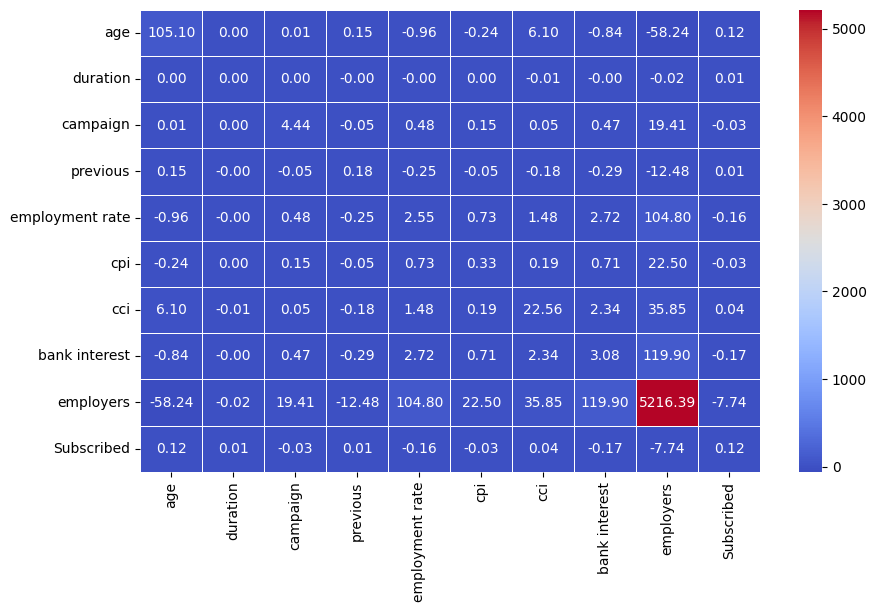

In [600]:
# Covariance among the features in dataset
cov = df.cov(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(cov, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
####### (Observation) #########
# Subscribers turn-out is negatively impacted by number of employers, bank interest rates, employment rate, number of contact in previous 
# campaign but positively with age, cci, duration of the call and previous interactions

In [ ]:

X = df.drop(columns=['Subscribed'], axis= 1)
y = df['Subscribed']   

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

#Split between train and test data 
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25, random_state= 42)


# Define the models and hyperparameters
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=10000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]})
}

results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        (name, model) 
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    y_pred1 = grid_search.best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test, y_pred1)

    accuracy = accuracy_score(y_test, y_pred1)
    precision = precision_score(y_test, y_pred1)
    recall = recall_score(y_test, y_pred1)
    f1score = f1_score(y_test, y_pred1)
    
    # Append the results
    results.append([name, train_score, test_score, fit_time, accuracy, precision, recall, f1score])

# Create the results DataFrame
results_df_after = pd.DataFrame(results, columns=['model', 'train score', 'test score', 'average fit time', 'accuracy', 'precision', 'recall', 'f1-score'])
results_df_after.set_index('model', inplace=True)




In [ ]:
# Models score with defaults
results_df_before 

,Train score,Test score,Train time,Accuracy,Precision,Recall,F1-score
Model,,,,,,,
knn,0.889618,0.863028,5.140009,0.863028,0.376238,0.117647,0.179245
logisticregression,0.874355,0.872212,0.293743,0.872212,0.486339,0.091847,0.154514
svc,0.880303,0.872737,28.457867,0.872737,0.495146,0.052632,0.095149
decisiontreeclassifier,0.924342,0.851089,0.469217,0.851089,0.344569,0.189886,0.244844


In [ ]:
#Models score after improvements
results_df_after

,train score,test score,average fit time,accuracy,precision,recall,f1-score
model,,,,,,,
knn,0.884585,0.861156,0.188975,0.861156,0.508039,0.204929,0.292052
logisticregression,0.879509,0.874932,1.936789,0.874932,0.602532,0.308690,0.408233
svc,0.877334,0.874026,34.074917,0.874026,0.618012,0.258106,0.364135
decisiontreeclassifier,0.890870,0.886895,0.130477,0.886895,0.640000,0.435798,0.518519


##### Questions